# 1. Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# 資料準備

In [2]:
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


自動下載data set

In [3]:
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


順序標記訓練集和測試集的(資料數量,形狀和通道數量)
例:(50000筆,像素32*32,RGB圖片通道為3)

In [4]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

因為圖片像素數據以0到255表達，因此將數據(圖片)除以255,進行標準化,提高準確率

In [5]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train, 10)
y_label_test_OneHot = np_utils.to_categorical(y_label_test, 10)

將圖片預先做好的標籤欄位轉換為Onehot encoding,方便後續繪制圖表時直接代入標籤文字

In [6]:
y_label_test_OneHot.shape

(10000, 10)

執行結果,數量為被處理的圖片數量

# 載入之前訓練的模型

In [7]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten

# Load VGG16，and reshape into 32x32x3
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# build the top
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# setup the model
model = Model(inputs=base_model.input, outputs=predictions)

# freeze the top of VGG16
for layer in base_model.layers:
    layer.trainable = False

# compile the model
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 3s 0us/step


# 訓練模型

In [9]:
train_history = model.fit(x_img_train_normalize, 
                          y_label_train_OneHot, 
                          batch_size=64, 
                          epochs=10, 
                          validation_data=(x_img_test_normalize, y_label_test_OneHot))


Epoch 1/10
782/782 [==============================] - 21s 16ms/step - loss: 1.3813 - accuracy: 0.5169 - val_loss: 1.4552 - val_accuracy: 0.4965
Epoch 2/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1991 - accuracy: 0.5835 - val_loss: 1.2524 - val_accuracy: 0.5636
Epoch 3/10
782/782 [==============================] - 10s 13ms/step - loss: 1.1354 - accuracy: 0.6051 - val_loss: 1.2629 - val_accuracy: 0.5574
Epoch 4/10
782/782 [==============================] - 11s 15ms/step - loss: 1.0889 - accuracy: 0.6194 - val_loss: 1.1788 - val_accuracy: 0.5866
Epoch 5/10
782/782 [==============================] - 12s 15ms/step - loss: 1.0509 - accuracy: 0.6332 - val_loss: 1.2359 - val_accuracy: 0.5653
Epoch 6/10
782/782 [==============================] - 12s 15ms/step - loss: 1.0173 - accuracy: 0.6455 - val_loss: 1.1777 - val_accuracy: 0.5904
Epoch 7/10
782/782 [==============================] - 11s 14ms/step - loss: 0.9897 - accuracy: 0.6540 - val_loss: 1.1420 - val_accuracy:

輸入圖像標籤文字

validatiom split:訓練集和測試集的比例,這次為50000:10000,所以是0.2

epochs:訓練週期10次

batch size:每批次輸入128張圖片

In [10]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel(train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

設定圖表欄位和格式

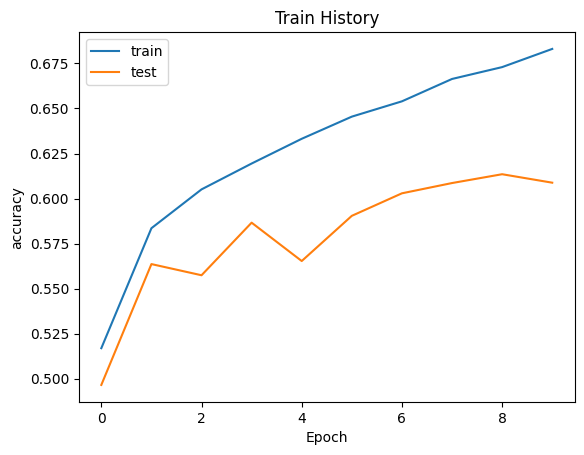

In [11]:
show_train_history('accuracy','val_accuracy')

accuracy:訓練時的準確率

val accuracy:驗證時的準確率

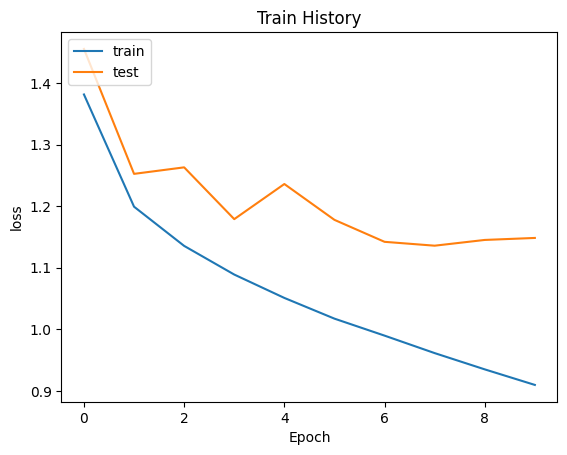

In [12]:
show_train_history('loss','val_loss')

loss:訓練時的誤差

val accuracy:驗證時的誤差

# 評估模型準確率

In [13]:
scores = model.evaluate(x_img_test_normalize, 
                        y_label_test_OneHot, verbose=0)
scores[1]

0.6087999939918518

# 進行預測

In [14]:
prediction=np.argmax(model.predict(x_img_test_normalize), axis=-1)

313/313 [==============================] - 2s 7ms/step


In [15]:
prediction[:10]

array([3, 8, 8, 9, 6, 6, 1, 4, 5, 9])

# 查看預測結果

In [16]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [17]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

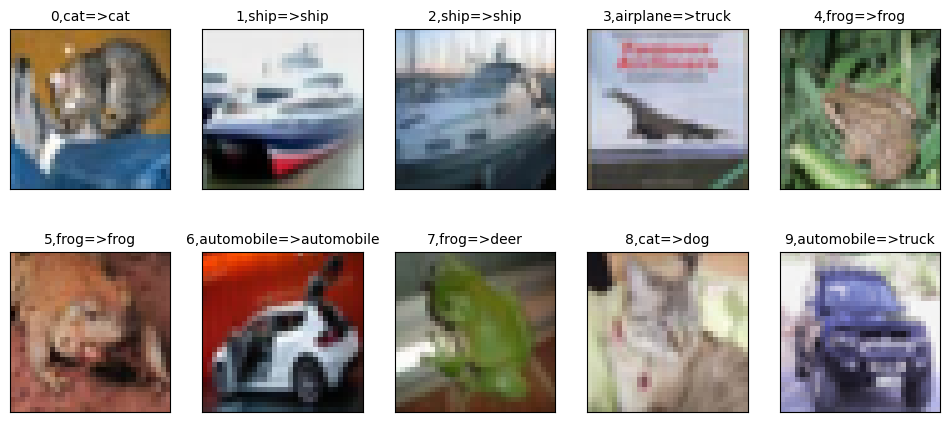

In [18]:
plot_images_labels_prediction(x_img_test,y_label_test,
                              prediction,0,10)

# 查看預測機率

In [19]:
Predicted_Probability=model.predict(x_img_test_normalize)

313/313 [==============================] - 2s 7ms/step


In [20]:
def show_Predicted_Probability(y,prediction,
                               x_img,Predicted_Probability,i):
    print('label:',label_dict[y[i][0]],
          'predict:',label_dict[prediction[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(x_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+
              ' Probability:%1.9f'%(Predicted_Probability[i][j]))

label: cat predict: cat


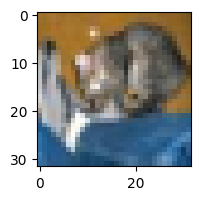

airplane Probability:0.007501145
automobile Probability:0.103958122
bird Probability:0.009766167
cat Probability:0.632545352
deer Probability:0.022916567
dog Probability:0.134215117
frog Probability:0.025011050
horse Probability:0.004945686
ship Probability:0.006563751
truck Probability:0.052577067


In [21]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,0)

label: airplane predict: truck


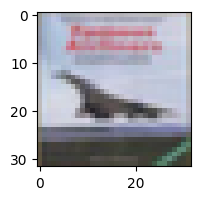

airplane Probability:0.089483619
automobile Probability:0.112744436
bird Probability:0.008791485
cat Probability:0.018337226
deer Probability:0.000971555
dog Probability:0.002003751
frog Probability:0.000558092
horse Probability:0.000155662
ship Probability:0.235947296
truck Probability:0.531006813


In [22]:
show_Predicted_Probability(y_label_test,prediction,
                           x_img_test,Predicted_Probability,3)

# confusion matrix

In [23]:
prediction.shape

(10000,)

建立混淆矩陣時結果資據必須為1維陣列,如果括號有多於一筆數據,則必須先進行數據處理

In [24]:
y_label_test.shape

(10000, 1)

執行結果顯示已轉換為1維陣列

In [25]:
y_label_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [26]:
y_label_test.reshape(-1)

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [27]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1),prediction,
            rownames=['label'],colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,680,37,37,11,19,7,1,18,98,92
1,21,661,7,16,8,15,13,10,22,227
2,74,26,489,48,134,59,90,31,11,38
3,22,48,70,356,77,175,70,33,27,122
4,16,18,63,36,603,47,77,60,31,49
5,11,19,69,126,68,547,26,55,9,70
6,7,27,68,57,106,60,609,2,12,52
7,22,16,35,26,101,64,11,624,8,93
8,57,69,13,11,8,4,3,6,714,115


匯入pandas模組

reshape(-1)轉換1維陣列

測試資料的預測結果

設定行的名稱label

設定列的名稱是predict

In [28]:
print(label_dict)

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


# Save model to Google Drive

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Save model to JSON

In [30]:
import os
try:
  os.makedirs('/content/Save/')
except:
  print("File existed")

In [31]:
model_json = model.to_json()
with open("/content/Save/cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# Save Weight to h5 

In [ ]:
model.save_weights("/content/Save/cifarCnnModelnew.h5")
print("Saved model to disk")